In [8]:
import time
import math

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


from collections import Counter
from sklearn.metrics import accuracy_score, confusion_matrix


from kohenen_map import KohonenNetwork 
from kohonen_layer_topologies import Topology



Read and visualize the data

In [9]:
df = pd.read_csv('iris.csv').drop("Id", axis=1)
print(df.head())

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0            5.1           3.5            1.4           0.2  Iris-setosa
1            4.9           3.0            1.4           0.2  Iris-setosa
2            4.7           3.2            1.3           0.2  Iris-setosa
3            4.6           3.1            1.5           0.2  Iris-setosa
4            5.0           3.6            1.4           0.2  Iris-setosa


<Figure size 1000x600 with 0 Axes>

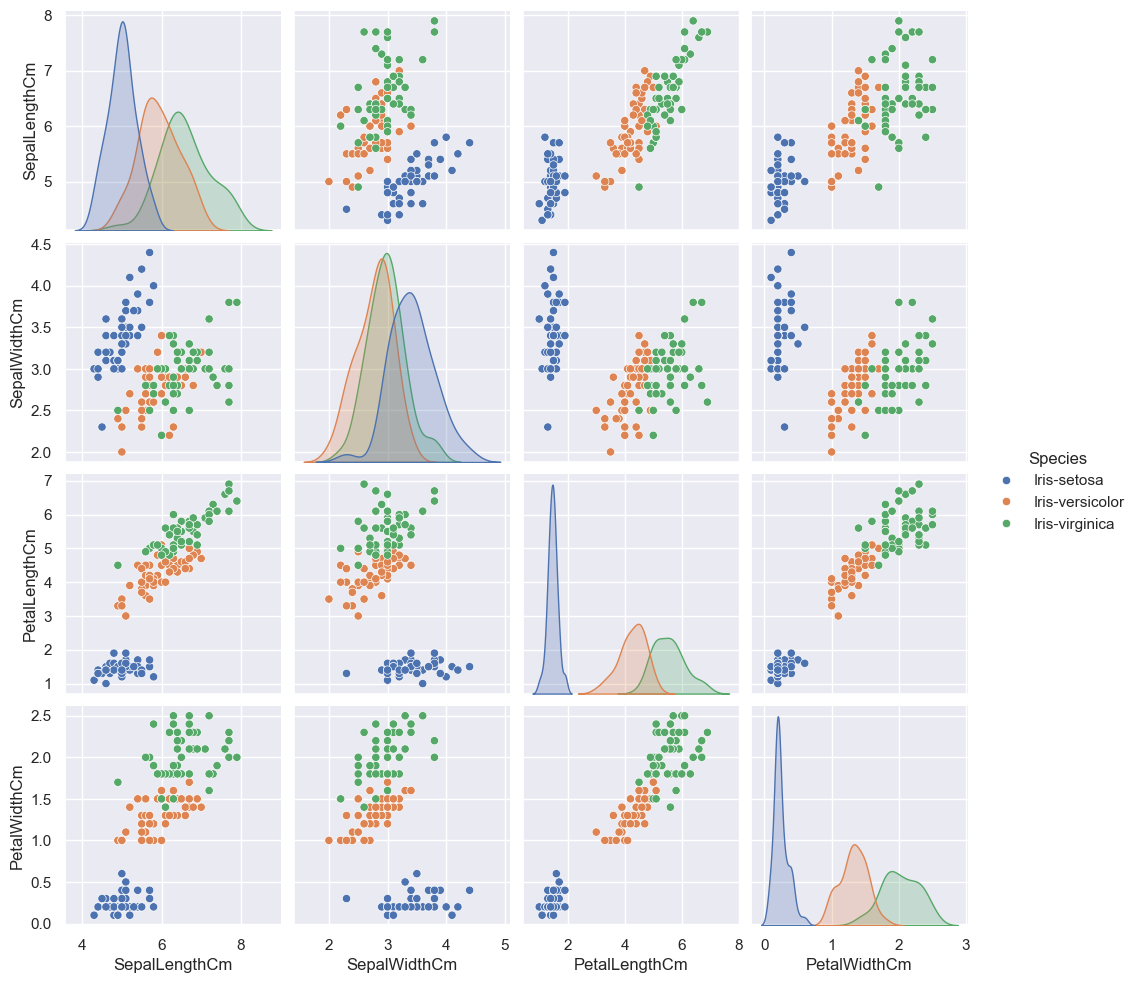

In [10]:
plt.figure(figsize=(10,6))
sns.set_theme(style="darkgrid")
sns.pairplot(data=df, hue="Species")

Create unstructured data by removing the labels and normalize the data, because Kohonen Network needs normalized data

In [11]:
features = df.drop("Species", axis=1)
normalized_input_patterns = ((features - features.min()) / (features.max() - features.min())).values

Create function that maps the created cluster to actual labels

In [12]:
def map_cluster_to_species(predicted_df):
    unique_clusters = predicted_df["Cluster"].unique()
    clusters_to_label = {}
    
    for cluster in unique_clusters:
        clusters_to_label[cluster] = []
        
    for cluster, species in zip(predicted_df["Cluster"], df["Species"]):
        clusters_to_label[cluster].append(species)
        
    map_clusters = {}
    
    for cluster in clusters_to_label:
        counter = Counter(clusters_to_label[cluster])
            
        map_clusters[cluster] = counter.most_common(1)[0][0]
        
    return map_clusters

In [13]:
def measure_prediction_accuracy(kohonen):
    predicted_labels = kohonen.predict_labels(normalized_input_patterns)
    predicted_df = features.copy(True)
    predicted_df["Cluster"] = predicted_labels
    cluster_to_species_map = map_cluster_to_species(predicted_df)
    for i in range(len(predicted_df)):
        predicted_df.at[i, "Species"] = cluster_to_species_map[predicted_df.at[i, "Cluster"]]
    return accuracy_score(df['Species'], predicted_df["Species"])


Global value of number of repeats for each parameter value during an experiment

In [14]:
number_of_repeats = 10

Test the learning rates for the network

In [6]:
learning_rates = np.arange(0.00001, 0.1, 0.00005)

num_of_epochs = 100
lr_decay = 0.99

accuracies_lr = [0] * len(learning_rates)

for _ in range(number_of_repeats):
    counter = 0
    for lr in learning_rates:

        kohonen = KohonenNetwork(4, 100, (10,10), Topology.HEXAGONAL)

        start_time = time.time()

        kohonen.train_network(normalized_input_patterns, lr, 4, num_of_epochs, lr_decay)

        end_time = time.time()

        acc = measure_prediction_accuracy(kohonen)
        accuracies_lr[counter] += acc
        print(f"Learning rate: {lr}, accuracy: {acc}, time: {end_time - start_time}")
        counter += 1

for i in range(len(accuracies_lr)):
    accuracies_lr[i] = accuracies_lr[i]/number_of_repeats


Learning rate: 1e-05, accuracy: 0.7, time: 2.7809982299804688
Learning rate: 2e-05, accuracy: 0.49333333333333335, time: 2.813032627105713
Learning rate: 3.0000000000000004e-05, accuracy: 0.7533333333333333, time: 2.7649734020233154
Learning rate: 4e-05, accuracy: 0.7733333333333333, time: 2.7590339183807373
Learning rate: 5e-05, accuracy: 0.72, time: 2.7609972953796387
Learning rate: 6e-05, accuracy: 0.66, time: 2.7509963512420654
Learning rate: 7.000000000000001e-05, accuracy: 0.7733333333333333, time: 2.8380002975463867
Learning rate: 8e-05, accuracy: 0.6666666666666666, time: 2.8189969062805176
Learning rate: 9e-05, accuracy: 0.7466666666666667, time: 2.7839725017547607
Learning rate: 0.0001, accuracy: 0.7266666666666667, time: 2.8980016708374023
Learning rate: 0.00011, accuracy: 0.76, time: 2.706990957260132
Learning rate: 0.00012, accuracy: 0.74, time: 2.772963523864746
Learning rate: 0.00013000000000000002, accuracy: 0.78, time: 2.8090529441833496
Learning rate: 0.00014000000000

Visualize the results

In [ ]:
plt.plot(learning_rates, accuracies_lr)

Based on the results I will go with the learning rate of 0.0005

Test the number of neurodes in the kohonen layer (assume square shape for simplicity)

In [44]:
num_of_epochs = 250
lr_decay = 0.99
number_of_neurodes = np.arange(2, 25, 1)

accuracies_n = [0] * len(number_of_neurodes)

for _ in range(number_of_repeats):
    counter = 0
    for n in number_of_neurodes:

        kohonen = KohonenNetwork(4, n**2, (n,n), Topology.HEXAGONAL)
        start_time = time.time()

        kohonen.train_network(normalized_input_patterns, 0.0005, math.floor(n * 0.8), num_of_epochs, lr_decay)

        end_time = time.time()
        acc = measure_prediction_accuracy(kohonen)
        accuracies_n[counter] += acc
        print(f"Number of neurones: {n}, accuracy: {acc}, time: {end_time - start_time}")
        counter += 1

for i in range(len(accuracies_n)):
    accuracies_n[i] = accuracies_n[i]/number_of_repeats

Number of neighbours: 2, accuracy: 0.3333333333333333, time: 1.4590263366699219
Number of neighbours: 3, accuracy: 0.62, time: 1.5019726753234863
Number of neighbours: 4, accuracy: 0.64, time: 2.1479978561401367
Number of neighbours: 5, accuracy: 0.6533333333333333, time: 2.9720003604888916
Number of neighbours: 6, accuracy: 0.6666666666666666, time: 3.5280332565307617
Number of neighbours: 7, accuracy: 0.78, time: 4.089004278182983
Number of neighbours: 8, accuracy: 0.72, time: 5.412960767745972
Number of neighbours: 9, accuracy: 0.7733333333333333, time: 6.169477939605713
Number of neighbours: 10, accuracy: 0.8, time: 7.368997812271118
Number of neighbours: 11, accuracy: 0.7933333333333333, time: 8.626999378204346
Number of neighbours: 12, accuracy: 0.78, time: 9.992991209030151
Number of neighbours: 13, accuracy: 0.8333333333333334, time: 11.632999897003174
Number of neighbours: 14, accuracy: 0.8066666666666666, time: 12.89599871635437
Number of neighbours: 15, accuracy: 0.84, time:

Plot the results

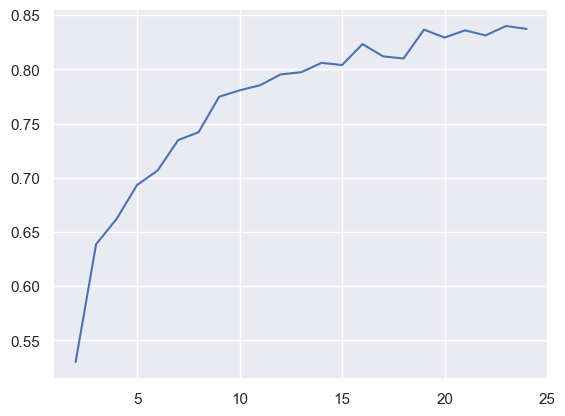

In [46]:
plt.plot(number_of_neurodes, accuracies_n)


Test the neighbourhood size (neighbourhood is given in percentage)

In [ ]:
num_of_epochs = 250
lr_decay = 0.99

neurodes_number = 225
shape = (15, 15)


neighbourhood_range = np.arange(0, 1, 0.05)

accuracies_neighbourhood = [0] * len(neighbourhood_range)

for _ in range(0, 10):
    i = 0
    for n in neighbourhood_range:

        kohonen = KohonenNetwork(4, neurodes_number, shape, Topology.HEXAGONAL)
        start_time = time.time()

        kohonen.train_network(normalized_input_patterns, 0.0005, round(n*shape[0]), num_of_epochs, lr_decay)

        end_time = time.time()

        acc = measure_prediction_accuracy(kohonen)
        accuracies_n[i] += acc
        print(f"Number of neighbours: {n}, accuracy: {acc}, time: {end_time - start_time}")
        i += 1

for i in range(len(accuracies_n)):
    accuracies_n[i] = accuracies_n[i]/10

visualize results

In [ ]:
plt.plot(neighbourhood_range, accuracies_n)

Test the number of epochs

In [ ]:
lr_decay = 0.99

neurodes_number = 400
shape = (20, 20)

number_of_epochs = np.arange(10, 300, 20)

accuracies_n = [0] * len(number_of_epochs)

for _ in range(0, 10):
    counter = 0

    for n in number_of_epochs:

        kohonen = KohonenNetwork(4, neurodes_number,shape, Topology.HEXAGONAL)

        start_time = time.time()

        kohonen.train_network(normalized_input_patterns, 0.0005, math.floor(neurodes_number/0.8), n, lr_decay)

        end_time = time.time()

        acc = measure_prediction_accuracy(kohonen)
        accuracies_n[counter] += acc
        print(f"Number of epochs - {n}, accuracy: {acc}, time: {end_time - start_time}")
        counter += 1

for i in range(len(accuracies_n)):
    accuracies_n[i] = accuracies_n[i]/10

Visualize the results

In [ ]:
plt.plot(number_of_epochs, accuracies_n)

Test different topologies

In [ ]:
num_of_epochs = 250
lr_decay = 0.99

neurodes_number = 144
shape = (12, 12)

topologies = [Topology.HEXAGONAL, Topology.RECTANGLE, Topology.LINEAR]
accuracies_n = [0] * len(topologies)
time_to_train = [0] * len(topologies)
for _ in range(number_of_repeats):
    counter = 0

    for n in topologies:

        kohonen = KohonenNetwork(4, neurodes_number,shape, n)
        start_time = time.time()

        kohonen.train_network(normalized_input_patterns, 0.0005, math.floor(neurodes_number*0.8), num_of_epochs, lr_decay, True)

        end_time = time.time()

        acc = measure_prediction_accuracy(kohonen)

        accuracies_n[counter] += acc
        time_to_train[counter] += end_time - start_time
        print(f"Topology {n}, accuracy: {acc}, time: {end_time - start_time}")
        counter += 1

for i in range(len(accuracies_n)):
    accuracies_n[i] = accuracies_n[i]/number_of_repeats
    time_to_train[i] = time_to_train[i]/number_of_repeats

Print out the results

In [ ]:
for i in range(len(time_to_train)):
    print(f"Topology {topologies[i]}, time to train {time_to_train[i]}, average accuracy: {accuracies_n[i]}")

Test how the neighbourhood decay influences the accuracy of the network

In [ ]:
accuracies_n = [0,0]
for _ in range(number_of_repeats):
    counter = 0
    for n in [True, False]:

        kohonen = KohonenNetwork(4, 100, (10,10), Topology.HEXAGONAL)
        start_time = time.time()

        kohonen.train_network(normalized_input_patterns, 0.0005, math.floor(neurodes_number*0.8), 250, 0.99, neighbourhood_decay=n)

        end_time = time.time()

        acc = measure_prediction_accuracy(kohonen)
        accuracies_n[i] += acc
        print(f"Neighbourhood decaay: {n}, accuracy: {acc}, time: {end_time - start_time}")
        counter += 1

for i in range(len(accuracies_n)):
    accuracies_n[i] = accuracies_n[i]/number_of_repeats

Print out the results

In [ ]:
print(f"For True accuracy is {accuracies_n[0]}")
print(f"For False accuracy is {accuracies_n[1]}")

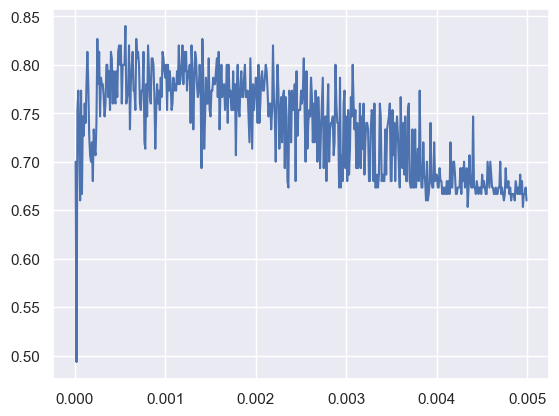

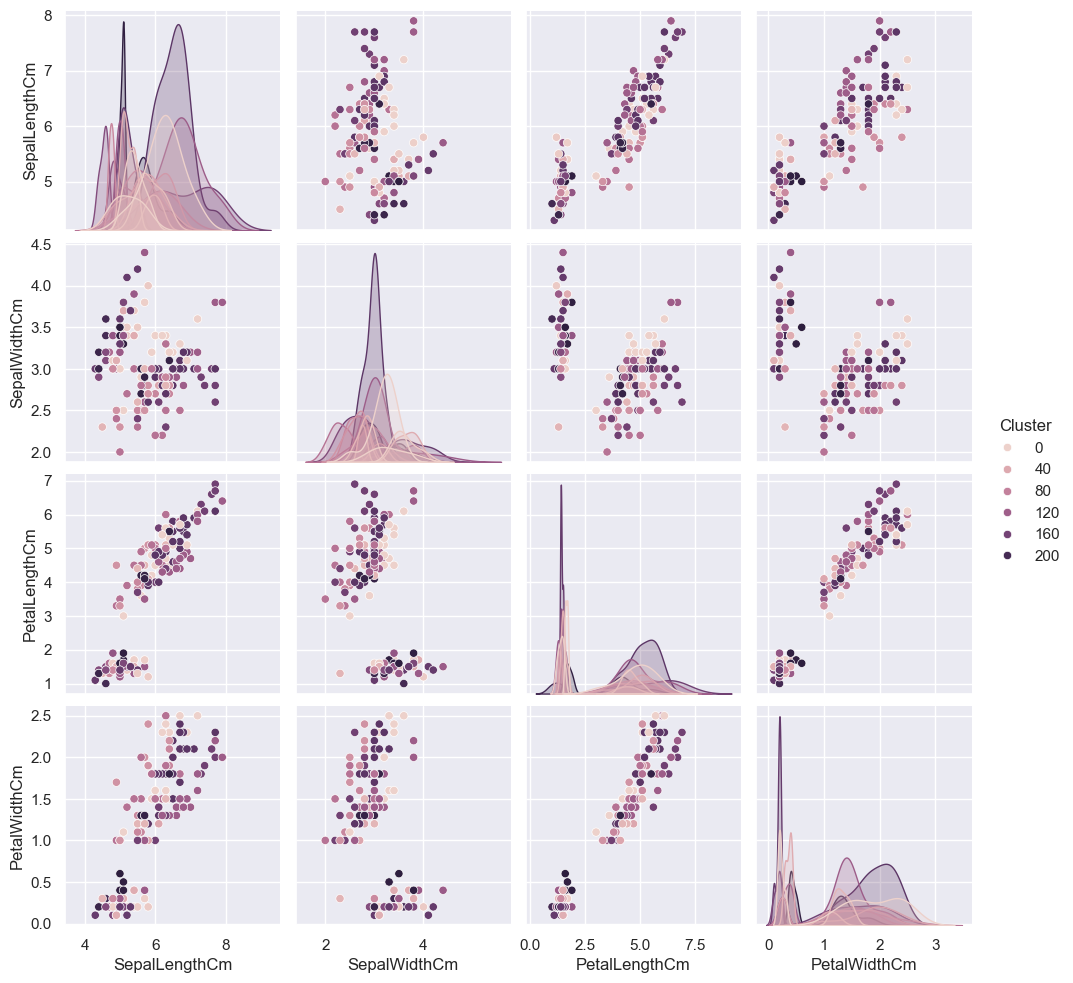

In [30]:
kohonen = KohonenNetwork(4,225,(15,15),Topology.HEXAGONAL)
kohonen.train_network(normalized_input_patterns, 0.0005, math.floor(225*0.8), 250, 0.99, True)
predicted_labels = kohonen.predict_labels(normalized_input_patterns)
predicted_df = features.copy(True)
predicted_df["Cluster"] = predicted_labels
sns.pairplot(predicted_df, hue="Cluster")


In [20]:
#merge clusters
map_clusters = map_cluster_to_species(predicted_df)

for i in range(len(predicted_df)):
    predicted_df.at[i, "Species"] = map_clusters[predicted_df.at[i, "Cluster"]]

predicted_df.drop(["Cluster"], axis=1, inplace=True)
custom_order = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
predicted_df["SortOrder"] = predicted_df["Species"].map(custom_order)
predicted_df.sort_values("SortOrder")
predicted_df.drop(["SortOrder"], axis=1, inplace=True)
sns.pairplot(predicted_df, hue="Species")


NameError: name 'map_cluster_to_species' is not defined

In [33]:
accuracy = accuracy_score(df["Species"], predicted_df["Species"])
confusion_matrix = confusion_matrix(df["Species"], predicted_df["Species"])

print(accuracy)
print(confusion_matrix)

0.78
[[50  0  0]
 [ 0 39 11]
 [ 0 22 28]]


Grid search using multiple threads

In [ ]:
import concurrent
from concurrent.futures import ThreadPoolExecutor
from itertools import product

learning_rates = [0.0005]
shapes = [(1,100), (2,50), (4, 25), (25, 4), (50, 2), (100, 1)]
neighbourhoods = [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
topologies = [Topology.LINEAR, Topology.HEXAGONAL, Topology.RECTANGLE]
lr_decays = [0.99]
neighbourhood_decay = [True]
epochs = [150]

parameters_combination = list(product(learning_rates, shapes, neighbourhoods, topologies, lr_decays, neighbourhood_decay, epochs))

number_of_parameters = len(parameters_combination)
number_of_repeats = 30
print(number_of_parameters)
results = {}

def train_by_grid(parameters):
    learning_rate, shape, neighbourhood, topology, lr_decay, neighbour_decay, epochs_number = parameters

    neighbourhood_range =  math.ceil(neighbourhood * min(shape))
    total_acc = 0
    total_time = 0
    for _ in range(number_of_repeats):
        kohonen_layer_size = shape[0] * shape[1]
        kohonen = KohonenNetwork(4, kohonen_layer_size, shape, topology)
        start_time = time.time()
        kohonen.train_network(normalized_input_patterns, learning_rate,neighbourhood_range, epochs_number, lr_decay, neighbour_decay)

        end_time = time.time()
        predicted_labels = kohonen.predict_labels(normalized_input_patterns)
        predicted_df = features.copy(True)
        predicted_df["Cluster"] = predicted_labels
        cluster_to_species_map = map_cluster_to_species(predicted_df)
        for j in range(len(predicted_df)):
            predicted_df.at[j, "Species"] = cluster_to_species_map[predicted_df.at[j, "Cluster"]]
        total_acc += accuracy_score(df['Species'], predicted_df["Species"])
        total_time += (end_time - start_time)

    return parameters, (total_acc/number_of_repeats), (total_time/number_of_repeats)


with ThreadPoolExecutor(max_workers=8) as executor:
    total_counter = 0
    futures = [executor.submit(train_by_grid, params) for params in parameters_combination]
    for future in concurrent.futures.as_completed(futures):
        total_counter += 1
        print(round(total_counter/number_of_parameters, 4) * 100, "% done")
        params, acc, total_time = future.result()
        results[params] = [acc, total_time]

144


Print out the results

In [9]:
grid_df = pd.DataFrame.from_dict(results, orient="index", columns=["Accuracy", "TotalTime"])
sorted_grid_df = grid_df.sort_values(by="Accuracy", ascending=False)
sorted_grid_df.head(20)

,Accuracy,TotalTime
"(0.0005, (2, 50), 0.3, Topology.LINEAR, 0.99, True, 100)",0.804889,13.199568
"(0.0005, (1, 100), 0.7, Topology.LINEAR, 0.99, True, 100)",0.804889,14.825354
"(0.0005, (1, 100), 0.3, Topology.LINEAR, 0.99, True, 100)",0.801333,13.039208
"(0.0005, (2, 50), 0.9, Topology.LINEAR, 0.99, True, 100)",0.801333,13.647943
"(0.0005, (1, 100), 0.4, Topology.LINEAR, 0.99, True, 100)",0.799778,14.459576
"(0.0005, (1, 100), 0.9, Topology.LINEAR, 0.99, True, 100)",0.799556,12.833247
"(0.0005, (1, 100), 0.5, Topology.LINEAR, 0.99, True, 100)",0.798889,15.828427
"(0.0005, (2, 50), 1.0, Topology.LINEAR, 0.99, True, 100)",0.798444,13.617592
"(0.0005, (100, 1), 0.8, Topology.LINEAR, 0.99, True, 100)",0.798222,9.420473
"(0.0005, (4, 25), 0.3, Topology.LINEAR, 0.99, True, 100)",0.797333,11.193756


Wniosek - jeżeli linearna topologia to wtedy mały neigbhourhood = 1